Q1 - Pyhton subroutine to solve for the Inverse position Kinematics for Standard manipulator.

In [34]:
#importing libraries
import numpy as np
import sympy as sym
from sympy import *
from numpy import pi, sin, cos, sqrt, absolute, arccos, arctan, sign
#defining variables
s1,s2,s3,s4,s5,s6 = sym.symbols('s1,s2,s3,s4,s5,s6')
c1,c2,c3,c4,c5,c6 = sym.symbols('c1,c2,c3,c4,c5,c6')
q1,q2,q3,q4,q5,q6 = pi/18,3*pi/18,pi/18,pi/18,pi/18,pi/18
d2,d3,d6 = 1,1,0.5
#creating matrix
r11,r21,r31,r41 = cos(q1)*(cos(q2)*(cos(q4)*cos(q5)*cos(q6)-sin(q4)*sin(q6))-sin(q2)*sin(q5)*cos(q6))-sin(q1)*(sin(q4)*cos(q5)*cos(q6)+cos(q4)*cos(q6)), sin(q1)*(cos(q2)*(cos(q4)*cos(q5)*cos(q6)-sin(q4)*sin(q6))-sin(q2)*sin(q5)*cos(q6))+cos(q1)*(sin(q4)*cos(q5)*cos(q6)+cos(q4)*cos(q6)), -sin(q2)*(cos(q4)*cos(q5)*cos(q6)-sin(q4)*sin(q6))-cos(q2)*sin(q5)*sin(q6), 0
r12,r22,r32,r42 = cos(q1)*(-cos(q2)*(cos(q4)*cos(q5)*sin(q6)+sin(q4)*cos(q6))+sin(q2)*sin(q5)*sin(q6))-sin(q1)*(-sin(q4)*cos(q5)*sin(q6)+cos(q4)*cos(q6)), sin(q1)*(-cos(q2)*(cos(q4)*cos(q5)*sin(q6)+sin(q4)*cos(q6))+sin(q2)*sin(q5)*sin(q6))+cos(q1)*(-sin(q4)*cos(q5)*sin(q6)+cos(q4)*cos(q6)), +sin(q2)*(cos(q4)*cos(q5)*cos(q6)+sin(q4)*sin(q6))+cos(q2)*sin(q5)*sin(q6), 0
r13,r23,r33,r43 = cos(q1)*(cos(q2)*cos(q4)*sin(q5)+sin(q2)*cos(q5))-sin(q1)*sin(q4)*sin(q5), sin(q1)*(cos(q2)*cos(q4)*sin(q5)+sin(q2)*cos(q5))+cos(q1)*sin(q4)*sin(q5), -sin(q2)*cos(q4)*sin(q5)+cos(q2)*cos(q5), 0
r14,r24,r34,r44 = cos(q1)*sin(q2)*d3-sin(q1)*d2+d6*(cos(q1)*cos(q2)*cos(q4)*sin(q5)+cos(q1)*cos(q5)*sin(q2)-sin(q1)*sin(q4)*sin(q5)), sin(q1)*sin(q2)*d3+cos(q1)*d2+d6*(cos(q1)*sin(q4)*sin(q5)+cos(q2)*cos(q4)*sin(q1)*sin(q5)+cos(q5)*sin(q1)*sin(q2)), cos(q2)*d3+d6*(cos(q2)*cos(q5)-cos(q4)*sin(q2)*sin(q5)),1
f_mat = [[r11,r12,r13,r14],[r21,r22,r23,r24],[r31,r32,r33,r34],[r41,r42,r43,r44]]
print(f_mat)
eq1 = sym.Eq(c1*s2*s3-s1*d2,0.16)#sym.Eq(Function('cos')(s1)*Function('sin')(s2)*s3-Function('sin')(s1)*d2,0.16)#eq1 = sym.Eq((s1**2-1)**0.5*s2*s3-s1*d2,1)
eq2 = sym.Eq(s1*s2*s3+d2*c1,1.05)#sym.Eq(Function('sin')(s1)*Function('sin')(s2)*s3+Function('cos')(s1)*d2,1.05)
eq3 = sym.Eq(c2*s3,1.45)#sym.Eq(Function('cos')(s2)*s3,1.45)
eq4 = sym.Eq(c1**2+s1**2,1)
eq5 = sym.Eq(c2**2+s2**2,1)
result = sym.solve([eq1,eq2,eq3,eq4,eq5],s1,s2,s3,c1,c2)
#result[0]
(s1,s2,s3,c1,c2)=result[0]
print("Angle1="+str(atan(s1/c1))+" Angle2="+str(atan(s2/c2))+" Linear="+str(s3))
rot_Mat = [[c1*c2,-s1,c1*s2,0],[s1*c2,c1,s1*s2,0],[-s2,0,c2,0],[0,0,0,1]]
w = np.transpose(rot_Mat)*(f_mat)
#print(w)
q1 = sym.Eq(c5,w[2][2])
q2 = sym.Eq(s4,w[1][2]/w[0][2])
q3 = sym.Eq(s6,-w[2][1]/w[2][0])
result1 = sym.solve([q1,q2,q3],[s4,c5,s6])
#print(result1)
print("Angle4="+str(atan(result1.get(s4)))+" Angle5="+str(acos(result1.get(c5))) +" Angle6="+str(atan(result1.get(s6))))

[[0.5070054663916311, -0.43789010799563355, 0.6255361307144429, 0.6315237641963951], [1.2452165677665659, 0.8774422227801884, 0.1409177561264703, 1.1420907199089083], [-0.4885930992666423, 0.5187467888736881, 0.7673634961210261, 1.2497071518449516], [0, 0, 0, 1]]
Angle1=-0.494922362024001 Angle2=-0.241997533106244 Linear=1.49351933365457
Angle4=0 Angle5=0.730256300557661 Angle6=-0.520357861134122


Q2 - Pyhton subroutine to solve for the inverse postion kinematics for the SCARA manipulator.

In [87]:
#importing libraries 
import sympy as sym
import numpy as np
from sympy import *
from numpy import pi, sin, cos, sqrt, absolute, arccos, arctan, sign
s1,s2,s3,s4,s5,s6 = sym.symbols('s1,s2,s3,s4,s5,s6')
c1,c2,c3,c4,c5,c6 = sym.symbols('c1,c2,c3,c4,c5,c6')
d2,d3,d6 = 1,1,0.5
eq1 = sym.Eq(d2*c1+d3*c2,1.4)#sym.Eq(Function('cos')(s1)*Function('sin')(s2)*s3-Function('sin')(s1)*d2,0.16)#eq1 = sym.Eq((s1**2-1)**0.5*s2*s3-s1*d2,1)
eq2 = sym.Eq(d2*s1+d3*s2,1.4)#sym.Eq(Function('sin')(s1)*Function('sin')(s2)*s3+Function('cos')(s1)*d2,1.05)
eq3 = sym.Eq(s3,0.2)#sym.Eq(Function('cos')(s2)*s3,1.45)
eq4 = sym.Eq(c1**2+s1**2,1)
eq5 = sym.Eq(c2**2+s2**2,1)
result = sym.solve([eq1,eq2,eq3,eq4,eq5],s1,s2,s3,c1,c2)
#print(result[0])
(s1,s2,s3,c1,c2)=result[0]
print("Angle1="+str(atan(s1/c1))+" Angle2="+str(atan(s2/c2))+" Linear="+str(s3))

iq1 = sym.Eq(s2*c4+c2*s4,0.9)
iq2 = sym.Eq(c2*c4+s2*s4,0.8)
result1 = sym.solve([iq1,iq2],[s4,c4])
#print(result1)
print("Angle4="+str(atan(result1.get(s4))))

Angle1=0.643501108793284 Angle2=0.927295218001612 Linear=0.200000000000000
Angle4=0.343023940420703


Q3 - Pyhton subroutine to calculate the Joint Velocities using end-effector cartesian velocities.

In [64]:
#importing libraries 
import sympy as sym
import numpy as np
from sympy import *
from numpy import pi, sin, cos, sqrt, absolute, arccos, arctan, sign

jacob = Matrix([[-11.156448908138957, 9.335387362109374, 0.0], [-8.657598394923445, 5.004596890082059, 0.0], [4.328799197461723, 2.5022984450410295, 0.0]])#, [0, 0, 1], [0, 0, 1], [0, 0, 1]
#j_in = jacob.inv()
j_jtrans = jacob*jacob.transpose()
#assuming 0 acceleration b matrix will be 0
#print(j_jtrans)
joint_vel = jacob.transpose()*j_jtrans.inv()*Matrix([1,1,1]) 
print(joint_vel)

Matrix([[211.615809440546, 143.307904720273, -24.9341018000127], [143.307904720273, 100.000000000000, -24.9540099677810], [-24.9341018000127, -24.9540099677810, 25.0000000000000]])
Matrix([[0.0546875000000000], [0.205078125000000], [0]])


Q6 - Python subroutine for the Inverse Kinematics of Spherical wrist.

In [3]:
#importing libraries 
import sympy as sym
import numpy as np
from sympy import *
from numpy import pi, sin, cos, sqrt, absolute, arccos, arctan, sign

[[r11,r12,r13],[r21,r22,r23],[r31,r32,r33]] = [[0.9,0.9,0.9],[0.9,0.9,0.9],[0.9,0.9,0.9]]
s1,s2,s3 = sym.symbols('s1,s2,s3')
c1,c2,c3 = sym.symbols('c1,c2,c3')
eq1 = sym.Eq(c1,r33)
eq2 = sym.Eq(c2*s1,r13)
eq3 = sym.Eq(s2*s1,r23)
eq4 = sym.Eq(-s1*c3,r31)
eq5 = sym.Eq(-s1*s3,r32)
eq6 = sym.Eq(c1**1+s1**2,1)
result = sym.solve([eq1,eq2,eq3,eq4,eq5,eq6],s1,s2,s3,c1,c2,c3)
#print(result[0])
(s1,s2,s3,c1,c2,c3)=result[0]
print("Angle1="+str(atan(s1/c1))+" Angle2="+str(atan(s2/c2))+" Angle3="+str(atan(s3/c3)))

(-0.316227766016838, -2.84604989415154, 2.84604989415154, 0.900000000000000, -2.84604989415154, 2.84604989415154)
Angle1=-0.337889611165861 Angle2=0.785398163397448 Angle3=0.785398163397448


Q9 - Pyhton code incorporating Dynamics and control of Stanford Manipulator

(-0.474963330849782, -0.211985631137779, 1.68837199692485, 0.880005587680033, 0.977272782896934)
(-0.932157359915714, -0.498837519664837, 1.67302121923184, 0.362053388818509, 0.866695522646006)


c:\Users\ishra\AppData\Local\Programs\Python\Python39\lib\site-packages\control\timeresp.py:941: UserWarning: Non-zero initial condition given for transfer function system. Internal conversion to state space used; may not be consistent with given X0.
  warnings.warn(


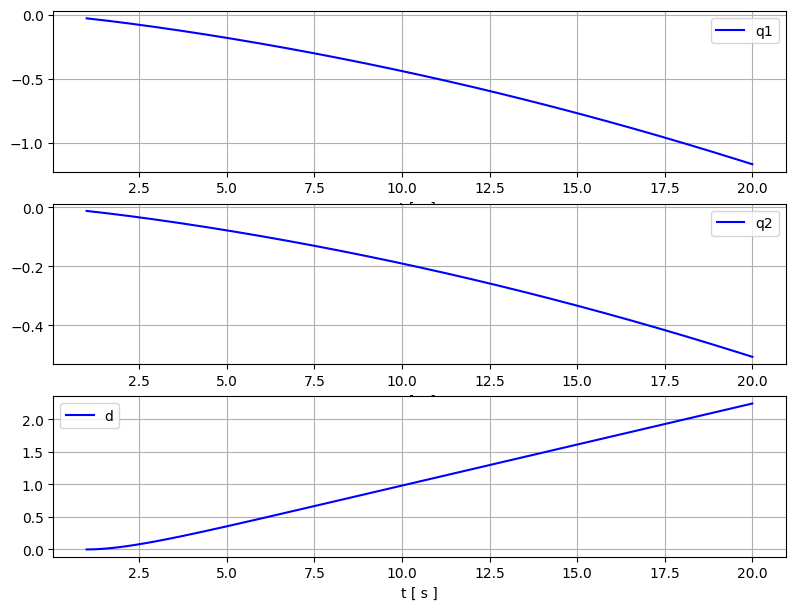

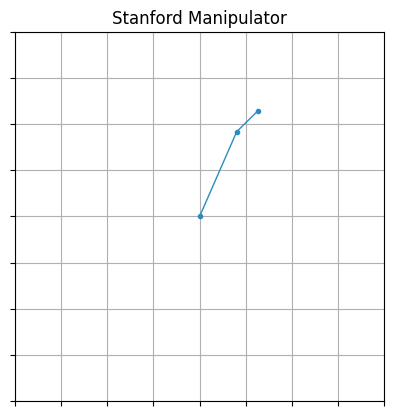

In [79]:
#importing libraries  
import numpy as np
import matplotlib.pyplot as plt
import control as ct
import sympy as sym
from sympy import *
from numpy import pi, sin, cos, sqrt, absolute, arccos, arctan, sign
import matplotlib.animation as animation
import mpl_toolkits.mplot3d.axes3d as p3

jeff,beff,ks = 5,3,1
kd,kp = 1,0.3
dyn = ct.tf([1],[jeff,beff])
stiff = ct.tf([ks],[1])
h1 = ct.series(stiff,dyn)
f1 = ct.tf([kd],[1])
h2 = ct.feedback(h1,f1,sign=-1)
feed_kp = ct.tf([kp],[1])
feed_s = ct.tf([1],[1,0])
h3 = ct.series(feed_kp,h2,feed_s)

def inv_kin(ox,oy,oz):
    s1,s2,s3,s4,s5,s6 = sym.symbols('s1,s2,s3,s4,s5,s6')
    c1,c2,c3,c4,c5,c6 = sym.symbols('c1,c2,c3,c4,c5,c6')
    d2,d3,d6 = 1,1,0.5
    q1,q2,q3,q4,q5,q6 = pi/18,pi/18,pi/18,pi/18,pi/18,pi/18
    r11,r21,r31,r41 = 0.16,0.16,0.16,ox
    r12,r22,r32,r42 = 1.05,1.05,1.05,oy
    r13,r23,r33,r43 = 1.45,1.45,1.45,oz
    r14,r24,r34,r44 = 0,0,0,1
    f_mat = [[r11,r12,r13,r14],[r21,r22,r23,r24],[r31,r32,r33,r34],[r41,r42,r43,r44]]
    #print(f_mat)
    #s3=0.5
    eq1 = sym.Eq(c1*s2*s3-s1*d2,r41)#sym.Eq(Function('cos')(s1)*Function('sin')(s2)*s3-Function('sin')(s1)*d2,0.16)#eq1 = sym.Eq((s1**2-1)**0.5*s2*s3-s1*d2,1)
    eq2 = sym.Eq(s1*s2*s3+d2*c1,r42)#sym.Eq(Function('sin')(s1)*Function('sin')(s2)*s3+Function('cos')(s1)*d2,1.05)
    eq3 = sym.Eq(c2*s3,r43)#sym.Eq(Function('cos')(s2)*s3,1.45)
    eq4 = sym.Eq(c1**2+s1**2,1)
    eq5 = sym.Eq(c2**2+s2**2,1)
    result = sym.solve([eq1,eq2,eq3,eq4,eq5],s1,s2,s3,c1,c2)#s3,
    print(result[0])
    (s1,s2,s3,c1,c2)=result[0] #s3,
    return (s1,s2,s3,c1,c2)

def get_angles(p1,p2):
    (p1s1,p1s2,p1s3,p1c1,p1c2) = inv_kin(p1[0],p1[1],p1[2])
    (p2s1,p2s2,p2s3,p2c1,p2c2) = inv_kin(p2[0],p2[1],p2[2])
    p1q1, p1q2 = float(atan(p1s1/p1c1)),float(atan(p1s2/p1c2))
    p2q1, p2q2 = float(atan(p2s1/p2c1)),float(atan(p2s2/p2c2))
    u = np.linspace(p1q1,p2q1,nt)# u = np.linspace(0,np.pi/6,nt)
    return (p1q1,p1q2,p2q1,p2q2,float(p1s3),float(p2s3))
# Simulation :

t0 = 1
t1 = 20
dt = 0.1
nt = int(t1 / dt ) + 1 # Number of points of sim time
t = np.linspace( t0 , t1 , nt )
# u = 3* np.ones( nt )
#end point 1
p1 = [0.16,1.05,1.65]
p2 = [0.63,1.14,1.45]
(p1q1,p1q2,p2q1,p2q2,p1s3,p2s3) = get_angles(p1,p2)
# (p1s1,p1s2,p1s3,p1c1,p1c2) = inv_kin(p1[0],p1[1],p1[2])
# (p2s1,p2s2,p2s3,p2c1,p2c2) = inv_kin(p2[0],p2[1],p2[2])
# p1q1, p1q2 = float(atan(p1s1/p1c1)),float(atan(p1s2/p1c2))
# p2q1, p2q2 = float(atan(p2s1/p2c1)),float(atan(p2s2/p2c2))
u = np.linspace(p1q1,p2q1,nt)# u = np.linspace(0,np.pi/6,nt)
v = np.linspace(p1q2,p2q2,nt)
w = np.linspace(p1s3,p2s3,nt)
# %% Simulation :
(t,x)=ct.forced_response(h3,t,u,X0=p1q1)
(t,y)=ct.forced_response(h3,t,v,X0=p1q2)
(t,z)=ct.forced_response(h3,t,w,X0=0)#t, y, x = ct.forced_response(h3 , t , u ,0)
# %% Plotting :
plt.close( 'all ')
fig_width_cm = 24
fig_height_cm = 18
plt . figure (1 , figsize =( fig_width_cm /2.54 , fig_height_cm /2.54))
plt . subplot (3 , 1 , 1)
plt.plot(t , x , 'blue')
plt . xlabel ( 't [ s ] ')
plt.grid()
plt.legend( labels =( 'q1' ,))
plt.subplot(3 , 1 , 2)
plt.plot(t , y , 'blue')
plt . xlabel ( 't [ s ] ')
plt.grid()
plt.legend( labels =( 'q2' ,))
plt.subplot(3 , 1 , 3)
plt.plot(t , z , 'blue')
plt.xlabel( 't [ s ]')
plt.grid()
plt.legend( labels =( 'd' ,))
plt.show()
#plt . savefig ( ’ sim_tf . pdf ’)

x1_arr,y1_arr = cos(x),-sin(x)
x2_arr,y2_arr = (cos(x)+cos(y)),-(sin(x)+sin(y))
x3_arr,y3_arr = np.linspace(p1[0],p2[0],nt),np.linspace(p1[1],p2[1],nt)# cos(x)*sin(y)*z - sin(x),sin(x)*sin(y)*z + cos(x)#cos(z),sin(z)
fig = plt.figure()
ax = fig.add_subplot(
    111, aspect="equal", autoscale_on=True, xlim=(-2, 2), ylim=(-2, 2)
)
# ax = p3.Axes3D(fig)
ax.grid(alpha=1)
ax.set_title("Stanford Manipulator")
ax.set_xticklabels([])
ax.set_yticklabels([])
(line, ) = ax.plot(
    [], [], ".-", lw=1, color="#2b8cbe"
) 
(line2, ) = ax.plot(
    [], [], ".-", lw=1, color='green'
) 
# initialization function
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x_points = [0, x1_arr[i], x3_arr[i]]#,x3_arr[i]
    y_points = [0, y1_arr[i], y3_arr[i]]#,y3_arr[i]
    # path_x.append(x2_arr[i])
    # path_y.append(y2_arr[i])
    line.set_data(x_points, y_points)
    #line2.set_data(path_x,path_y)
    
    return (line,line2,)#line2
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(x1_arr)-1, interval=40, blit=True, repeat=False
)
## to save animation, uncomment the line below. Ensure ffmpeg is installed:
ani.save('Trajectory_stanford.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# show the animation
plt.show()

Q10 - Python code incorporating Dynamics and control of SCARA manipulator

(0.397355871000212, 0.652644128999788, 1.65000000000000, 0.917664596561109, -0.757664596561109)
Angle4=atan(4.0/(25.0*c2 + 25.0*s2))
(0.202947885659393, 0.937052114340607, 1.45000000000000, 0.979189540235384, -0.349189540235384)
Angle4=atan(4.0/(25.0*c2 + 25.0*s2))


c:\Users\ishra\AppData\Local\Programs\Python\Python39\lib\site-packages\control\timeresp.py:941: UserWarning: Non-zero initial condition given for transfer function system. Internal conversion to state space used; may not be consistent with given X0.
  warnings.warn(


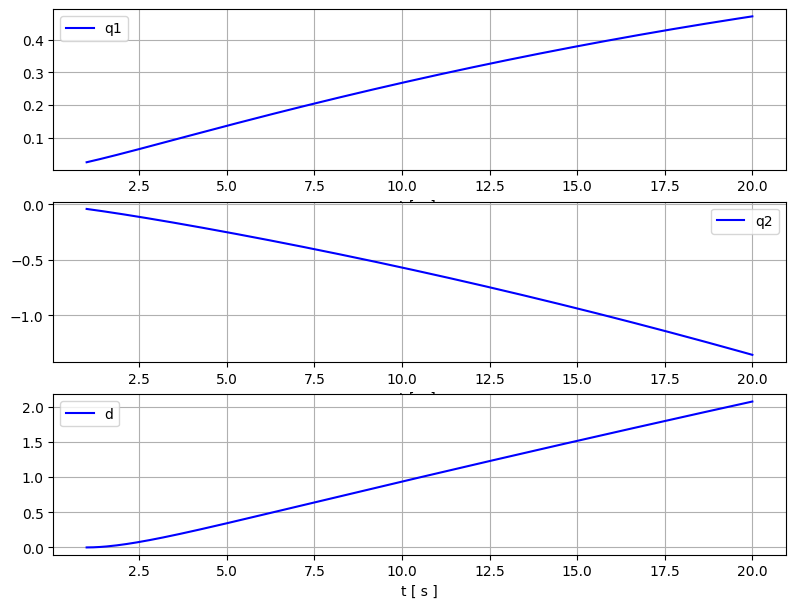

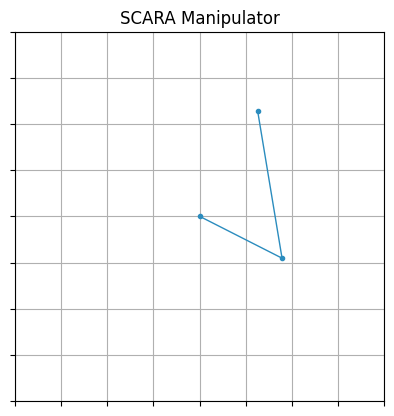

In [4]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import control as ct
import sympy as sym
from sympy import *
from numpy import pi, sin, cos, sqrt, absolute, arccos, arctan, sign
import matplotlib.animation as animation
import mpl_toolkits.mplot3d.axes3d as p3

jeff,beff,ks = 5,3,1
kd,kp = 1,0.3
dyn = ct.tf([1],[jeff,beff])
stiff = ct.tf([ks],[1])
h1 = ct.series(stiff,dyn)
f1 = ct.tf([kd],[1])
h2 = ct.feedback(h1,f1,sign=-1)
feed_kp = ct.tf([kp],[1])
feed_s = ct.tf([1],[1,0])
h3 = ct.series(feed_kp,h2,feed_s)

def inv_kin(ox,oy,oz):
    s1,s2,s3,s4,s5,s6 = sym.symbols('s1,s2,s3,s4,s5,s6')
    c1,c2,c3,c4,c5,c6 = sym.symbols('c1,c2,c3,c4,c5,c6')
    d2,d3,d6 = 1,1,0.5
    q1,q2,q3,q4,q5,q6 = pi/18,pi/18,pi/18,pi/18,pi/18,pi/18
    r11,r21,r31,r41 = 0.16,0.16,0.16,ox
    r12,r22,r32,r42 = 1.05,1.05,1.05,oy
    r13,r23,r33,r43 = 1.45,1.45,1.45,oz
    r14,r24,r34,r44 = 0,0,0,1
    f_mat = [[r11,r12,r13,r14],[r21,r22,r23,r24],[r31,r32,r33,r34],[r41,r42,r43,r44]]
    #print(f_mat)
    #s3=0.5
    eq1 = sym.Eq(d2*c1+d3*c2,ox)#sym.Eq(Function('cos')(s1)*Function('sin')(s2)*s3-Function('sin')(s1)*d2,0.16)#eq1 = sym.Eq((s1**2-1)**0.5*s2*s3-s1*d2,1)
    eq2 = sym.Eq(d2*s1+d3*s2,oy)#sym.Eq(Function('sin')(s1)*Function('sin')(s2)*s3+Function('cos')(s1)*d2,1.05)
    eq3 = sym.Eq(s3,oz)#sym.Eq(Function('cos')(s2)*s3,1.45)
    eq4 = sym.Eq(c1**2+s1**2,1)
    eq5 = sym.Eq(c2**2+s2**2,1)
    result = sym.solve([eq1,eq2,eq3,eq4,eq5],s1,s2,s3,c1,c2)
    print(result[0])
    iq1 = sym.Eq(s2*c4+c2*s4,r21)
    iq2 = sym.Eq(c2*c4+s2*s4,r11)
    result1 = sym.solve([iq1,iq2],[s4,c4])
    #print(result1)
    print("Angle4="+str(atan(result1.get(s4))))
    (s1,s2,s3,c1,c2)=result[0] #s3,
    return (s1,s2,s3,result1.get(s4),c1,c2,result1.get(c4))

def get_angles(p1,p2):
    (p1s1,p1s2,p1s3,p1s4,p1c1,p1c2,p1c4) = inv_kin(p1[0],p1[1],p1[2])
    (p2s1,p2s2,p2s3,p2s4,p2c1,p2c2,p2c4) = inv_kin(p2[0],p2[1],p2[2])
    p1q1, p1q2 = float(atan(p1s1/p1c1)),float(atan(p1s2/p1c2))
    p2q1, p2q2 = float(atan(p2s1/p2c1)),float(atan(p2s2/p2c2))
    u = np.linspace(p1q1,p2q1,nt)# u = np.linspace(0,np.pi/6,nt)
    return (p1q1,p1q2,p2q1,p2q2,float(p1s3),float(p2s3))
# %% Simulation :

t0 = 1
t1 = 20
dt = 0.1
nt = int(t1 / dt ) + 1 # Number of points of sim time
t = np.linspace( t0 , t1 , nt )
# u = 3* np.ones( nt )
#end point 1
p1 = [0.16,1.05,1.65]
p2 = [0.63,1.14,1.45]
(p1q1,p1q2,p2q1,p2q2,p1s3,p2s3) = get_angles(p1,p2)
# (p1s1,p1s2,p1s3,p1c1,p1c2) = inv_kin(p1[0],p1[1],p1[2])
# (p2s1,p2s2,p2s3,p2c1,p2c2) = inv_kin(p2[0],p2[1],p2[2])
# p1q1, p1q2 = float(atan(p1s1/p1c1)),float(atan(p1s2/p1c2))
# p2q1, p2q2 = float(atan(p2s1/p2c1)),float(atan(p2s2/p2c2))
u = np.linspace(p1q1,p2q1,nt)# u = np.linspace(0,np.pi/6,nt)
v = np.linspace(p1q2,p2q2,nt)
w = np.linspace(p1s3,p2s3,nt)
# %% Simulation :
(t,x)=ct.forced_response(h3,t,u,X0=p1q1)
(t,y)=ct.forced_response(h3,t,v,X0=p1q2)
(t,z)=ct.forced_response(h3,t,w,X0=0)#t, y, x = ct.forced_response(h3 , t , u ,0)
# %% Plotting :
plt.close( 'all ')
fig_width_cm = 24
fig_height_cm = 18
plt . figure (1 , figsize =( fig_width_cm /2.54 , fig_height_cm /2.54))
plt . subplot (3 , 1 , 1)
plt.plot(t , x , 'blue')
plt . xlabel ( 't [ s ] ')
plt.grid()
plt.legend( labels =( 'q1' ,))
plt.subplot(3 , 1 , 2)
plt.plot(t , y , 'blue')
plt . xlabel ( 't [ s ] ')
plt.grid()
plt.legend( labels =( 'q2' ,))
plt.subplot(3 , 1 , 3)
plt.plot(t , z , 'blue')
plt.xlabel( 't [ s ]')
plt.grid()
plt.legend( labels =( 'd' ,))
plt.show()
#plt . savefig ( ’ sim_tf . pdf ’)

x1_arr,y1_arr = cos(x),-sin(x)
x2_arr,y2_arr = (cos(x)+cos(y)),-(sin(x)+sin(y))
x3_arr,y3_arr = np.linspace(p1[0],p2[0],nt),np.linspace(p1[1],p2[1],nt)# cos(x)*sin(y)*z - sin(x),sin(x)*sin(y)*z + cos(x)#cos(z),sin(z)
fig = plt.figure()
ax = fig.add_subplot(
    111, aspect="equal", autoscale_on=True, xlim=(-2, 2), ylim=(-2, 2)
)
# ax = p3.Axes3D(fig)
ax.grid(alpha=1)
ax.set_title("SCARA Manipulator")
ax.set_xticklabels([])
ax.set_yticklabels([])
(line, ) = ax.plot(
    [], [], ".-", lw=1, color="#2b8cbe"
) 
(line2, ) = ax.plot(
    [], [], ".-", lw=1, color='green'
) 
# initialization function
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x_points = [0, x1_arr[i], x3_arr[i]]#,x3_arr[i]
    y_points = [0, y1_arr[i], y3_arr[i]]#,y3_arr[i]
    # path_x.append(x2_arr[i])
    # path_y.append(y2_arr[i])
    line.set_data(x_points, y_points)
    #line2.set_data(path_x,path_y)
    
    return (line,line2,)#line2
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(x1_arr)-1, interval=40, blit=True, repeat=False
)
## to save animation, uncomment the line below. Ensure ffmpeg is installed:
ani.save('Trajectory_SCARA.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# show the animation
plt.show()

Q11 - Python code incorporating Dynamics and Control of PUMA Manipulator

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct
import sympy as sym
from sympy import *
from numpy import pi, sin, cos, sqrt, absolute, arccos, arctan, sign
import matplotlib.animation as animation
import mpl_toolkits.mplot3d.axes3d as p3

jeff,beff,ks = 5,3,1
kd,kp = 1,0.3
dyn = ct.tf([1],[jeff,beff])
stiff = ct.tf([ks],[1])
h1 = ct.series(stiff,dyn)
f1 = ct.tf([kd],[1])
h2 = ct.feedback(h1,f1,sign=-1)
feed_kp = ct.tf([kp],[1])
feed_s = ct.tf([1],[1,0])
h3 = ct.series(feed_kp,h2,feed_s)

def inv_kin(ox,oy,oz):
    s1,s2,s3,s4,s5,s6 = sym.symbols('s1,s2,s3,s4,s5,s6')
    c1,c2,c3,c4,c5,c6 = sym.symbols('c1,c2,c3,c4,c5,c6')

    d2,d3,d4 = 1,1,0.5
    q1,q2,q3,q4,q5,q6 = pi/18,pi/18,pi/18,pi/18,pi/18,pi/18
    r11,r21,r31,r41 = 0.16,0.16,0.16,ox
    r12,r22,r32,r42 = 1.05,1.05,1.05,oy
    r13,r23,r33,r43 = 1.45,1.45,1.45,oz
    r14,r24,r34,r44 = 0,0,0,1
    f_mat = [[r11,r12,r13,r14],[r21,r22,r23,r24],[r31,r32,r33,r34],[r41,r42,r43,r44]]
    #print(f_mat)
    #s3=0.5
    eq1 = sym.Eq(c1*(d2*c2+d3*c3 + d4*s3)-d2*s1,ox)#sym.Eq(Function('cos')(s1)*Function('sin')(s2)*s3-Function('sin')(s1)*d2,0.16)#eq1 = sym.Eq((s1**2-1)**0.5*s2*s3-s1*d2,1)
    eq2 = sym.Eq(s1*(d2*c2+d3*c3+d4*s3)+d2*c1,oy)#sym.Eq(Function('sin')(s1)*Function('sin')(s2)*s3+Function('cos')(s1)*d2,1.05)
    eq3 = sym.Eq(d4*c3-d3*s3-d2*s2,oz)#sym.Eq(Function('cos')(s2)*s3,1.45)
    eq4 = sym.Eq(c1**2+s1**2,1)
    eq5 = sym.Eq(c2**2+s2**2,1)
    eq6 = sym.Eq(c3**2+s3**2,1)
    result = sym.solve([eq1,eq2,eq3,eq4,eq5,eq6],s1,s2,s3,c1,c2,c3)
    print(result[0])
    iq1 = sym.Eq(s2*c4+c2*s4,r21)
    iq2 = sym.Eq(c2*c4+s2*s4,r11)
    result1 = sym.solve([iq1,iq2],[s4,c4])
    #print(result1)
    print("Angle4="+str(atan(result1.get(s4))))
    (s1,s2,s3,c1,c2,c3)=result[0] #s3,
    return (s1,s2,s3,result1.get(s4),c1,c2,c3,result1.get(c4))

def get_angles(p1,p2):
    (p1s1,p1s2,p1s3,p1s4,p1c1,p1c2,p1c3,p1c4) = inv_kin(p1[0],p1[1],p1[2])
    (p2s1,p2s2,p2s3,p2s4,p2c1,p2c2,p2c3,p2c4) = inv_kin(p2[0],p2[1],p2[2])
    p1q1, p1q2,p1q3 = float(atan(p1s1/p1c1)),float(atan(p1s2/p1c2)), float(atan(p1s3/p1c3))
    p2q1, p2q2,p2q3 = float(atan(p2s1/p2c1)),float(atan(p2s2/p2c2)), float(atan(p2s3/p2c3))
    u = np.linspace(p1q1,p2q1,nt)# u = np.linspace(0,np.pi/6,nt)
    return (p1q1,p1q2,p2q1,p2q2,p1q3,p2q3)
# %% Simulation :

t0 = 1
t1 = 20
dt = 0.1
nt = int(t1 / dt ) + 1 # Number of points of sim time
t = np.linspace( t0 , t1 , nt )
# u = 3* np.ones( nt )
#end point 1
p1 = [0.16,1.05,1.65]
p2 = [0.63,1.14,1.45]
(p1q1,p1q2,p2q1,p2q2,p1s3,p2s3) = get_angles(p1,p2)
# (p1s1,p1s2,p1s3,p1c1,p1c2) = inv_kin(p1[0],p1[1],p1[2])
# (p2s1,p2s2,p2s3,p2c1,p2c2) = inv_kin(p2[0],p2[1],p2[2])
# p1q1, p1q2 = float(atan(p1s1/p1c1)),float(atan(p1s2/p1c2))
# p2q1, p2q2 = float(atan(p2s1/p2c1)),float(atan(p2s2/p2c2))
u = np.linspace(p1q1,p2q1,nt)# u = np.linspace(0,np.pi/6,nt)
v = np.linspace(p1q2,p2q2,nt)
w = np.linspace(p1s3,p2s3,nt)
# %% Simulation :
(t,x)=ct.forced_response(h3,t,u,X0=p1q1)
(t,y)=ct.forced_response(h3,t,v,X0=p1q2)
(t,z)=ct.forced_response(h3,t,w,X0=0)#t, y, x = ct.forced_response(h3 , t , u ,0)
# %% Plotting :
plt.close( 'all ')
fig_width_cm = 24
fig_height_cm = 18
plt . figure (1 , figsize =( fig_width_cm /2.54 , fig_height_cm /2.54))
plt . subplot (3 , 1 , 1)
plt.plot(t , x , 'blue')
plt . xlabel ( 't [ s ] ')
plt.grid()
plt.legend( labels =( 'q1' ,))
plt.subplot(3 , 1 , 2)
plt.plot(t , y , 'blue')
plt . xlabel ( 't [ s ] ')
plt.grid()
plt.legend( labels =( 'q2' ,))
plt.subplot(3 , 1 , 3)
plt.plot(t , z , 'blue')
plt.xlabel( 't [ s ]')
plt.grid()
plt.legend( labels =( 'd' ,))
plt.show()
#plt . savefig ( ’ sim_tf . pdf ’)

x1_arr,y1_arr = cos(x),-sin(x)
x2_arr,y2_arr = (cos(x)+cos(y)),-(sin(x)+sin(y))
x3_arr,y3_arr = np.linspace(p1[0],p2[0],nt),np.linspace(p1[1],p2[1],nt)# cos(x)*sin(y)*z - sin(x),sin(x)*sin(y)*z + cos(x)#cos(z),sin(z)
fig = plt.figure()
ax = fig.add_subplot(
    111, aspect="equal", autoscale_on=True, xlim=(-2, 2), ylim=(-2, 2)
)
# ax = p3.Axes3D(fig)
ax.grid(alpha=1)
ax.set_title("PUMA Manipulator")
ax.set_xticklabels([])
ax.set_yticklabels([])
(line, ) = ax.plot(
    [], [], ".-", lw=1, color="#2b8cbe"
) 
(line2, ) = ax.plot(
    [], [], ".-", lw=1, color='green'
) 
# initialization function
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x_points = [0, x1_arr[i], x3_arr[i]]#,x3_arr[i]
    y_points = [0, y1_arr[i], y3_arr[i]]#,y3_arr[i]
    # path_x.append(x2_arr[i])
    # path_y.append(y2_arr[i])
    line.set_data(x_points, y_points)
    #line2.set_data(path_x,path_y)
    
    return (line,line2,)#line2
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(x1_arr)-1, interval=40, blit=True, repeat=False
)
## to save animation, uncomment the line below. Ensure ffmpeg is installed:
ani.save('Trajectory_PUMA.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# show the animation
plt.show()

(-0.474963330849782, -0.887864517260367, -0.936914622305684, 0.880005587680033, 0.460104986921479, -0.349558279132103)
Angle4=atan(4.0/(25.0*c2 + 25.0*s2))
(-0.932157359915714, -0.983400457462024, -0.779685316451944, 0.362053388818509, 0.181448450705654, -0.626171547827935)
Angle4=atan(4.0/(25.0*c2 + 25.0*s2))


NameError: name 'p2c3' is not defined